- This notebook contains, how to get real time crypto currency data at the desired levels, apart from this all Advanced forecasting models (combined) have been used to make prediction on crypto data. In short, this notebook will give an idea how to use combined models to produce predicted result and future prediction (selected number of days ) as well for the Time Series dataset.

In [55]:
import requests
import pandas as pd
import datetime as dt
import time
import plotly.express as px
import plotly.graph_objects as go

In [50]:
insert_pair='B-BTC_USDT'
int_limit='1m'
data_len=1200
url=f"https://public.coindcx.com/market_data/candles?pair={insert_pair}&interval={int_limit}&limit={data_len}"

response= requests.get(url)
data= response.json()
df=pd.DataFrame(data)
df['time']=df['time'].apply( lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(int(str(x)[:-3]))))
df

,open,high,low,volume,close,time
0,62996.44,63005.11,62996.44,2.26038,63005.11,2024-05-10 12:20:00
1,63022.45,63022.46,62996.44,12.96432,62996.45,2024-05-10 12:19:00
2,62973.47,63022.46,62973.47,16.47977,63022.46,2024-05-10 12:18:00
3,62931.67,62973.48,62925.08,14.71910,62973.48,2024-05-10 12:17:00
4,62916.01,62940.00,62916.00,9.53714,62931.67,2024-05-10 12:16:00
...,...,...,...,...,...,...
995,61332.33,61348.34,61298.00,28.16066,61308.60,2024-05-09 19:45:00
996,61388.00,61388.01,61320.00,18.62251,61332.34,2024-05-09 19:44:00
997,61436.15,61436.15,61363.54,46.07199,61388.01,2024-05-09 19:43:00
998,61429.99,61516.81,61429.99,82.95313,61436.15,2024-05-09 19:42:00


In [53]:
df['time']= pd.to_datetime(df['time'])

In [54]:
df.dtypes

open             float64
high             float64
low              float64
volume           float64
close            float64
time      datetime64[ns]
dtype: object

# Vizualization

- Plotly express

In [59]:
import plotly.express as px

# Assuming daily_data is a DataFrame with a 'date' column

fig = px.line(df, x='time', y='close', markers=True)
# Update the marker color
fig.update_traces(marker=dict(color='red'))

# Update the layout to include zooming functionality
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()

- Plotly objects 

In [60]:
import plotly.graph_objects as go

# Assuming df is your DataFrame containing stock data
# Convert time column to string to avoid issues with Plotly's candlestick chart
df['time'] = df['time'].astype(str)

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['time'],
                                     open=df['open'],
                                     high=df['high'],
                                     low=df['low'],
                                     close=df['close'])])

# Update the layout to include zooming functionality and rangeslider
fig.update_layout(
    title='Candlestick Chart for Stock Data',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Show the chart
fig.show()


## Time Series Analysis`

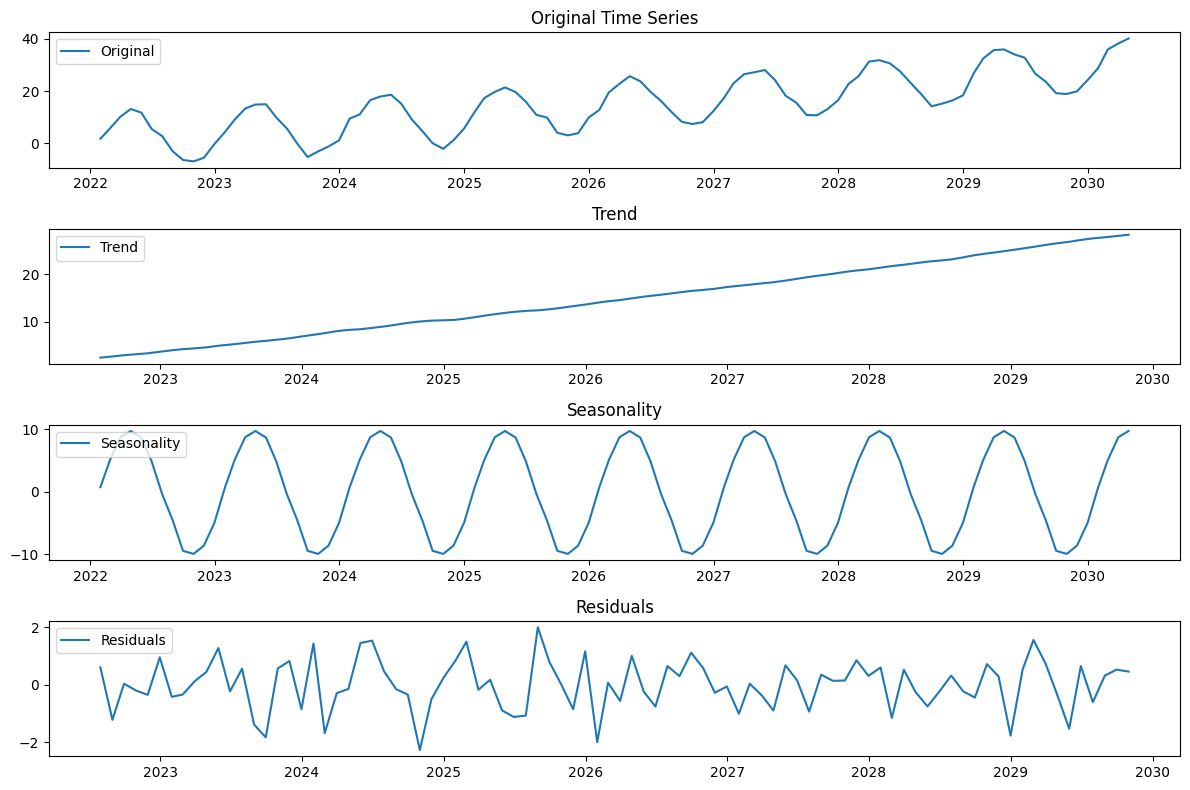

DataFrame with Extracted Components:
    Trend  Seasonality  Residuals
0     NaN     0.733843        NaN
1     NaN     5.070304        NaN
2     NaN     8.722861        NaN
3     NaN     9.723851        NaN
4     NaN     8.674229        NaN
..    ...          ...        ...
95    NaN    -4.937323        NaN
96    NaN     0.733843        NaN
97    NaN     5.070304        NaN
98    NaN     8.722861        NaN
99    NaN     9.723851        NaN

[100 rows x 3 columns]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Generate fake time series data
np.random.seed(0)
n = 100
t = np.arange(n)
trend = 0.3 * t  # Linear trend
seasonality = 10 * np.sin(2 * np.pi * t / 12)  # Monthly seasonality
noise = np.random.normal(0, 1, n)  # Gaussian noise
data = trend + seasonality + noise

# Create a DataFrame
df = pd.DataFrame({'Date': pd.date_range(start='2022-01-01', periods=n, freq='M'),
                   'Value': data})

# Step 2: Decompose the time series
result = seasonal_decompose(df['Value'], model='additive', period=12)

# Step 3: Store the extracted values in a DataFrame
decomposed_df = pd.DataFrame({
    'Trend': result.trend,
    'Seasonality': result.seasonal,
    'Residuals': result.resid
})

# Plot the original and decomposed time series
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Date'], df['Value'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(df['Date'], result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')
plt.subplot(413)
plt.plot(df['Date'], result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonality')
plt.subplot(414)
plt.plot(df['Date'], result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.title('Residuals')
plt.tight_layout()
plt.show()

# Display the DataFrame with extracted components
print("DataFrame with Extracted Components:")
print(decomposed_df)


To enhance the analysis of the time series data and decomposition, we can incorporate the following advanced concepts:

- 1 Handling missing values in the dataset.
- 2 Using multiplicative decomposition instead of additive decomposition.
- 3 Visualizing the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify seasonality and lag order.
- 4 Performing differencing to achieve stationarity if necessary.
- 5 Using more sophisticated techniques for trend estimation, such as polynomial regression.
- 6 Utilizing more robust methods for seasonality estimation, such as Fourier transformation.
Let's integrate these concepts into the previous example:

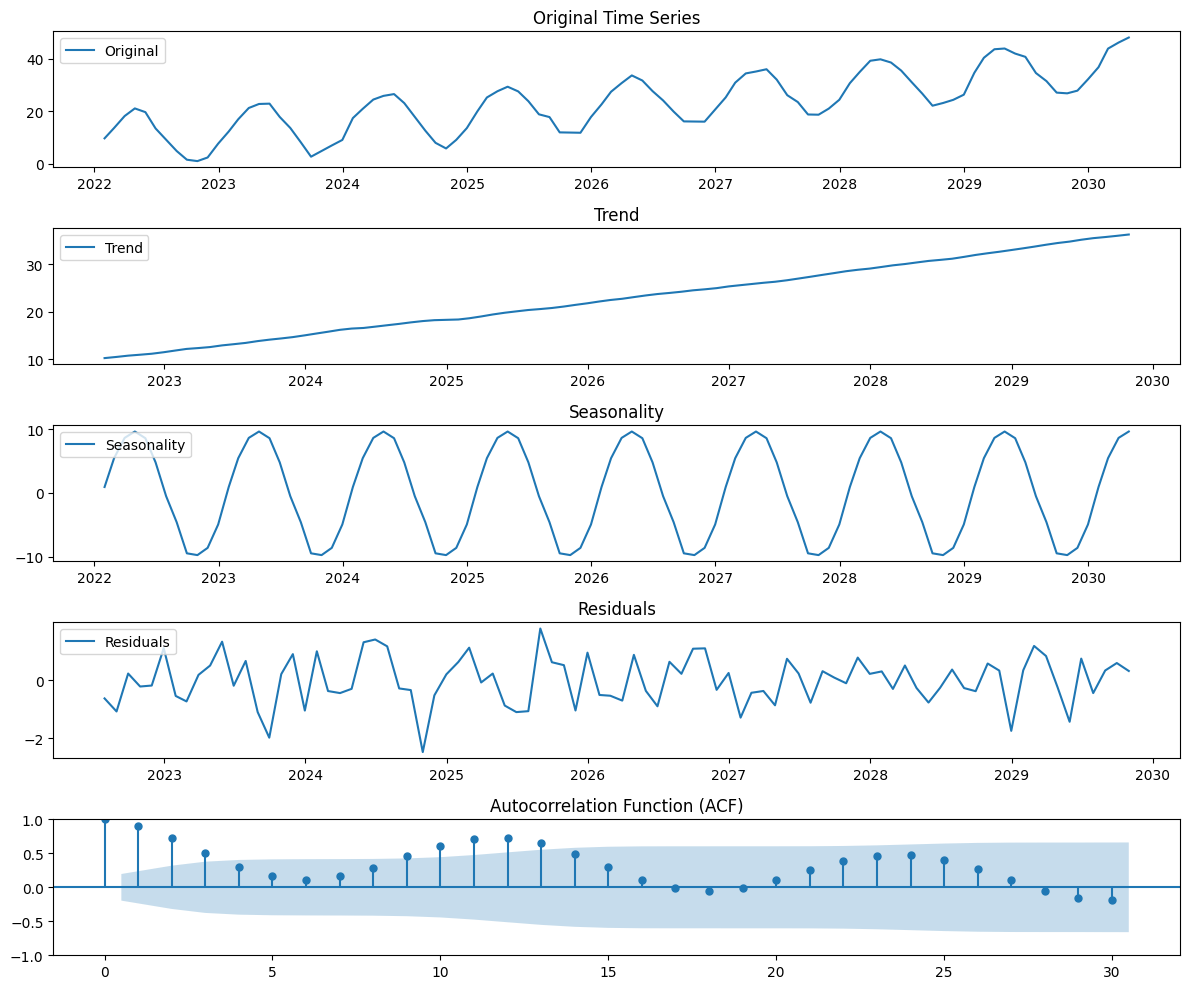

DataFrame with Extracted Components:
    Trend  Seasonality  Residuals
0     NaN     0.917722        NaN
1     NaN     5.442568        NaN
2     NaN     8.626829        NaN
3     NaN     9.627819        NaN
4     NaN     8.578198        NaN
..    ...          ...        ...
95    NaN    -4.961152        NaN
96    NaN     0.917722        NaN
97    NaN     5.442568        NaN
98    NaN     8.626829        NaN
99    NaN     9.627819        NaN

[100 rows x 3 columns]


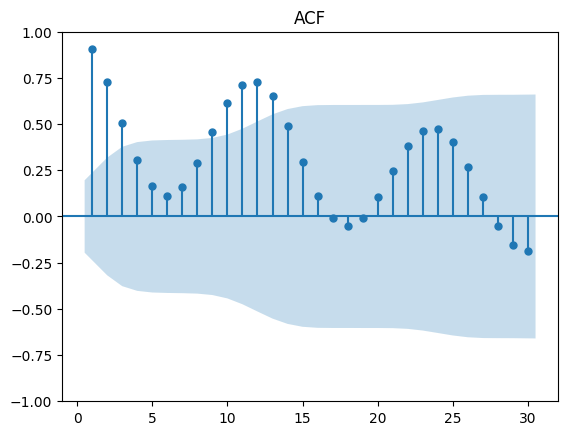

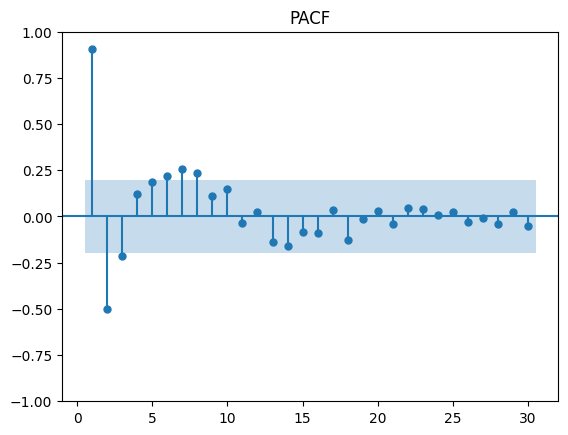

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Generate fake time series data with missing values
np.random.seed(0)
n = 100
t = np.arange(n)
trend = 0.3 * t  # Linear trend
seasonality = 10 * np.sin(2 * np.pi * t / 12)  # Monthly seasonality
noise = np.random.normal(0, 1, n)  # Gaussian noise
data = trend + seasonality + noise

# Introduce missing values
missing_indices = np.random.choice(np.arange(n), size=10, replace=False)
data[missing_indices] = np.nan

# Create a DataFrame
df = pd.DataFrame({'Date': pd.date_range(start='2022-01-01', periods=n, freq='M'),
                   'Value': data})

# Handle missing values
df['Value'] = df['Value'].interpolate(method='linear')

# Ensure all values are positive
min_value = df['Value'].min()
if min_value <= 0:
    df['Value'] = df['Value'] - min_value + 1  # Shift values to make them positive

# Step 2: Decompose the time series using additive decomposition
result = seasonal_decompose(df['Value'], model='additive', period=12)

# Step 3: Visualize the decomposed time series and autocorrelation functions
plt.figure(figsize=(12, 10))

plt.subplot(511)
plt.plot(df['Date'], df['Value'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(512)
plt.plot(df['Date'], result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(513)
plt.plot(df['Date'], result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonality')

plt.subplot(514)
plt.plot(df['Date'], result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.title('Residuals')

plt.subplot(515)
plot_acf(df['Value'], ax=plt.gca(), lags=30)
plt.title('Autocorrelation Function (ACF)')

plt.tight_layout()
plt.show()

# Step 4: Perform differencing if necessary to achieve stationarity

# Step 5: Store the extracted values in a DataFrame
decomposed_df = pd.DataFrame({
    'Trend': result.trend,
    'Seasonality': result.seasonal,
    'Residuals': result.resid
})

# Step 6: Store ACF and PACF values
plot_acf(df['Value'], lags=30, alpha=0.05, title="ACF", zero=False)
plot_pacf(df['Value'], lags=30, alpha=0.05, title="PACF", zero=False)

# Display the DataFrame with extracted components
print("DataFrame with Extracted Components:")
print(decomposed_df)

# You can further analyze the ACF and PACF values for seasonality and lag order.


To cover more advanced concepts in time series analysis, we can extend the previous example to include:

- 1 Handling of non-linear trends and seasonality.
- 2 Seasonal adjustment techniques like seasonal differencing or seasonal adjustment through regression.
- 3 Identification and handling of outliers and anomalies.
- 4 Forecasting using advanced models like ARIMA, SARIMA, SARIMAX, or Prophet.
- 5 Model evaluation and selection using techniques like cross-validation, AIC/BIC, or grid search.
- 6 Visualization of forecasted values and prediction intervals.
Here's an updated version of the code incorporating these concepts:

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


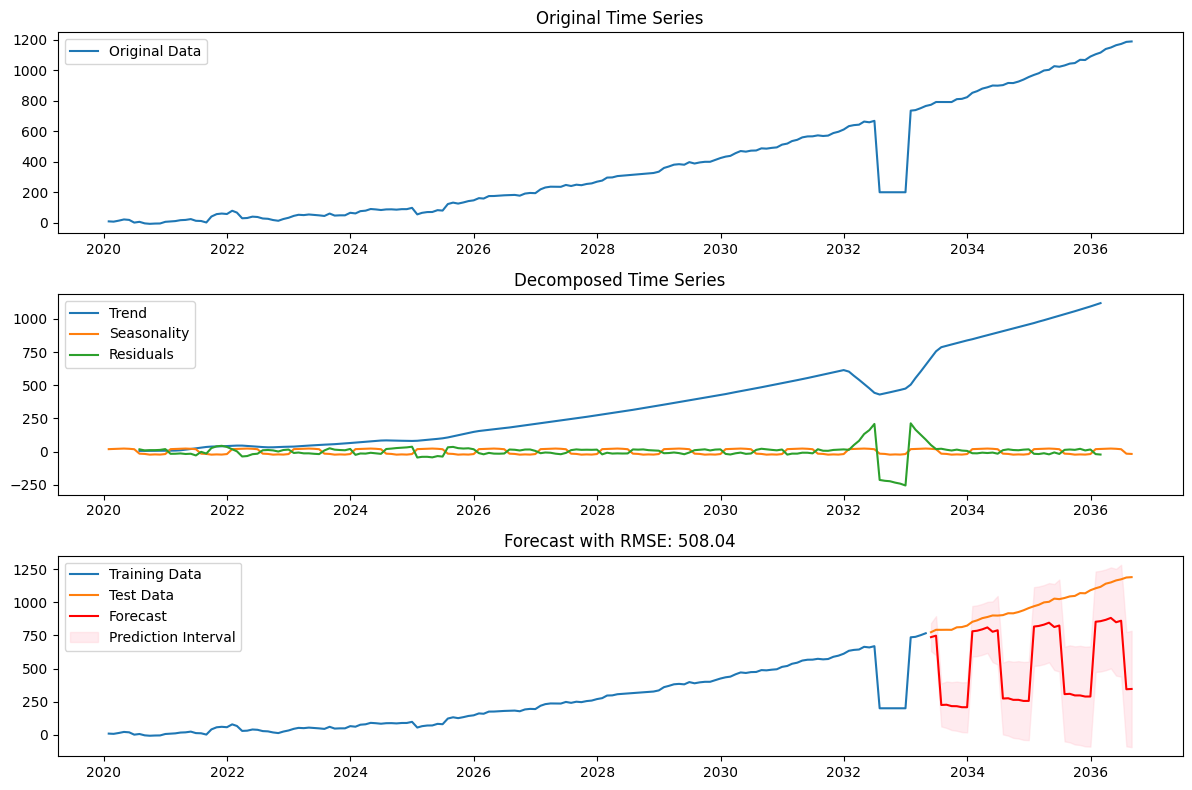

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import TimeSeriesSplit

# Step 1: Generate fake time series data with non-linear trends and seasonality
np.random.seed(0)
n = 200
t = np.arange(n)
trend = 0.03 * t ** 2  # Quadratic trend
seasonality = 10 * np.sin(2 * np.pi * t / 12)  # Monthly seasonality
noise = np.random.normal(0, 5, n)  # Gaussian noise
data = trend + seasonality + noise

# Create a DataFrame
df = pd.DataFrame({'Date': pd.date_range(start='2020-01-01', periods=n, freq='M'),
                   'Value': data})

# Introduce outliers and anomalies
df.loc[20:25, 'Value'] += 50  # Positive outliers
df.loc[60:65, 'Value'] -= 50  # Negative outliers
df.loc[100:105, 'Value'] = np.nan  # Missing values
df.loc[150:155, 'Value'] = 200  # Anomalies

# Handle missing values
df['Value'] = df['Value'].interpolate(method='linear')

# Step 2: Decompose the time series to identify trend, seasonality, and residuals
result = seasonal_decompose(df['Value'], model='additive', period=12)

# Step 3: Seasonal adjustment through seasonal differencing
df['Seasonal_Diff'] = df['Value'] - df['Value'].shift(12)

# Step 4: Model selection and forecasting using SARIMAX
# Split data into train and test sets
train_size = int(0.8 * len(df))
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit SARIMAX model
model = SARIMAX(train['Value'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 5: Model evaluation
# Calculate RMSE
rmse_val = rmse(test['Value'], forecast_mean)

# Step 6: Visualization of original data, decomposition, and forecast
plt.figure(figsize=(12, 8))

# Original data
plt.subplot(311)
plt.plot(df['Date'], df['Value'], label='Original Data')
plt.legend(loc='upper left')
plt.title('Original Time Series')

# Decomposed components
plt.subplot(312)
plt.plot(df['Date'], result.trend, label='Trend')
plt.plot(df['Date'], result.seasonal, label='Seasonality')
plt.plot(df['Date'], result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.title('Decomposed Time Series')

# Forecast and actual values
plt.subplot(313)
plt.plot(train['Date'], train['Value'], label='Training Data')
plt.plot(test['Date'], test['Value'], label='Test Data')
plt.plot(test['Date'], forecast_mean, label='Forecast', color='red')
forecast_ci.index = test.index  # Aligning index
plt.fill_between(test['Date'], forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Prediction Interval')
plt.legend(loc='upper left')
plt.title(f'Forecast with RMSE: {rmse_val:.2f}')

plt.tight_layout()
plt.show()


To incorporate even more complex concepts and use robust models for time series analysis, we can integrate the following:

- 1  Handling multiple seasonalities: Some time series may exhibit multiple seasonal patterns. We can use models like TBATS (Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend and Seasonal components) which can handle multiple seasonalities effectively.
- 2 Handling exogenous variables: Some time series may have external factors that influence the behavior. We can use models like SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) to incorporate exogenous variables into the forecasting process.
- 3 Model selection using automated methods: Instead of manually selecting model parameters, we can use automated methods like auto-ARIMA to search for the best model configuration.
- 4 Robust outlier detection and handling: We can use robust methods for outlier detection and handling, such as the Hampel filter or robust regression techniques, to mitigate the impact of outliers on model performance.

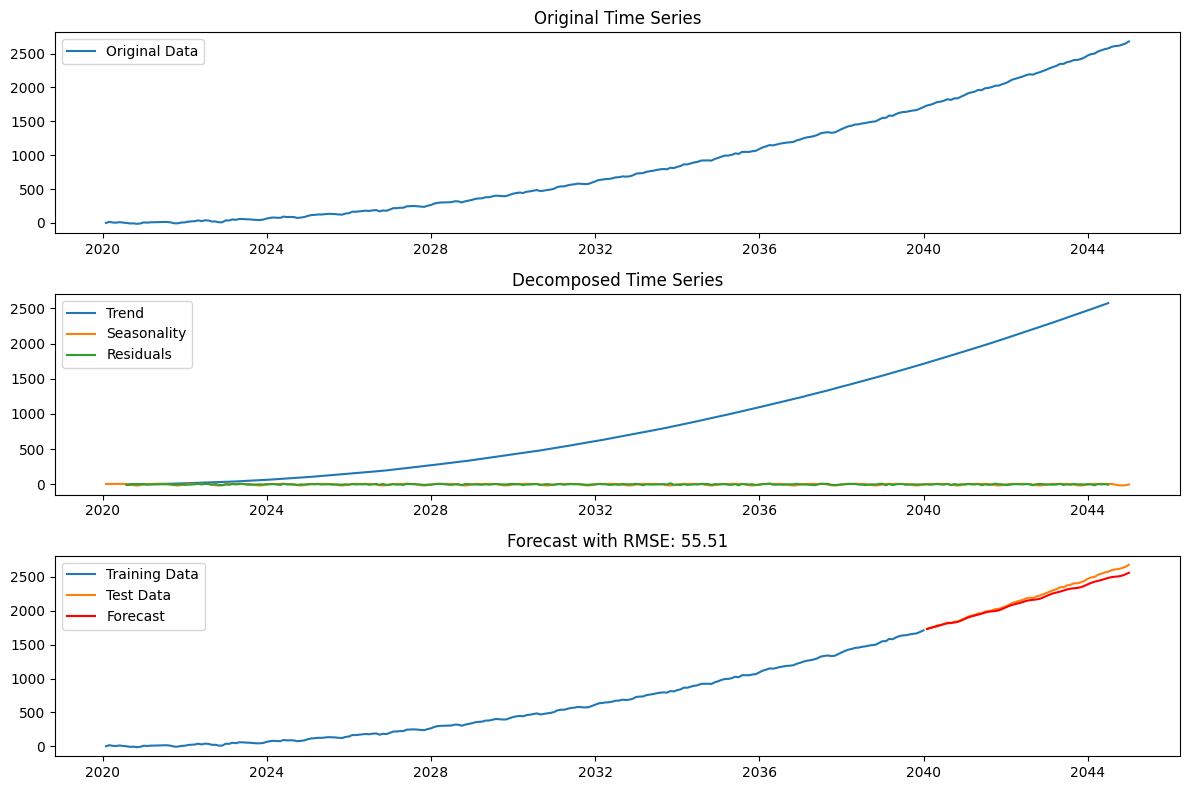

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tbats import TBATS
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tools.eval_measures import rmse

# Step 1: Generate fake time series data with multiple seasonalities and exogenous variables
np.random.seed(0)
n = 300
t = np.arange(n)
trend = 0.03 * t ** 2  # Quadratic trend
seasonality1 = 10 * np.sin(2 * np.pi * t / 12)  # Monthly seasonality
seasonality2 = 5 * np.cos(2 * np.pi * t / 6)  # Bi-monthly seasonality
exogenous_variable = np.random.normal(0, 1, n)  # Exogenous variable
noise = np.random.normal(0, 5, n)  # Gaussian noise
data = trend + seasonality1 + seasonality2 + exogenous_variable + noise

# Create a DataFrame
df = pd.DataFrame({'Date': pd.date_range(start='2020-01-01', periods=n, freq='M'),
                   'Value': data})

# Handle missing values
df['Value'] = df['Value'].interpolate(method='linear')

# Step 2: Decompose the time series to identify trend, seasonality, and residuals
result = seasonal_decompose(df['Value'], model='additive', period=12)

# Step 3: Model selection and forecasting using TBATS (Trigonometric, Box-Cox, ARMA, Trend and Seasonal components)
# Split data into train and test sets
train_size = int(0.8 * len(df))
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit TBATS model
estimator = TBATS(seasonal_periods=(12, 6))
model = estimator.fit(train['Value'])

# Forecast
forecast = model.forecast(steps=len(test))

# Step 4: Model evaluation
# Calculate RMSE
rmse_val = rmse(test['Value'], forecast)

# Step 5: Visualization of original data, decomposition, and forecast
plt.figure(figsize=(12, 8))

# Original data
plt.subplot(311)
plt.plot(df['Date'], df['Value'], label='Original Data')
plt.legend(loc='upper left')
plt.title('Original Time Series')

# Decomposed components
plt.subplot(312)
plt.plot(df['Date'], result.trend, label='Trend')
plt.plot(df['Date'], result.seasonal, label='Seasonality')
plt.plot(df['Date'], result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.title('Decomposed Time Series')

# Forecast and actual values
plt.subplot(313)
plt.plot(train['Date'], train['Value'], label='Training Data')
plt.plot(test['Date'], test['Value'], label='Test Data')
plt.plot(test['Date'], forecast, label='Forecast', color='red')
plt.legend(loc='upper left')
plt.title(f'Forecast with RMSE: {rmse_val:.2f}')

plt.tight_layout()
plt.show()


Note:-
One of the most complex concepts in time series analysis is dealing with non-linear and non-stationary data that exhibits complex patterns, including long-term dependencies, irregularities, and structural breaks. To address such complexities, we can employ deep learning models, particularly Recurrent Neural Networks (RNNs) and its variants like Long Short-Term Memory (LSTM) networks.
Here's how we can integrate LSTM networks into time series analysis:

In this code:

- 1 We generate non-linear and non-stationary time series data with quadratic trend, monthly seasonality, and noise.
- 2 The data is normalized using Min-Max scaling.
- 3 LSTM model architecture is defined with one LSTM layer and one Dense output layer.
- 4 The model is trained on the training data with a specified number of epochs and batch size.
- 5 Predictions are made on both training and test data.
- 6The predictions are inverse transformed to the original scale using Min-Max scaler.
- 7 Root Mean Squared Error (RMSE) is calculated to evaluate the model's performance.
- 8 Visualization shows the original data, train/test splits, and predictions.
LSTM networks are powerful tools for capturing complex temporal dependencies and patterns in time series data, making them suitable for tackling some of the most challenging aspects of time series analysis.

Epoch 1/100


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0794
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0215
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.9979e-04
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9557e-04 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2740e-04
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0091e-04
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.5812e-05
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4926e-05
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2758e-05
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7508e-05
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6178e-05
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0927e-05
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.3601e-06
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━

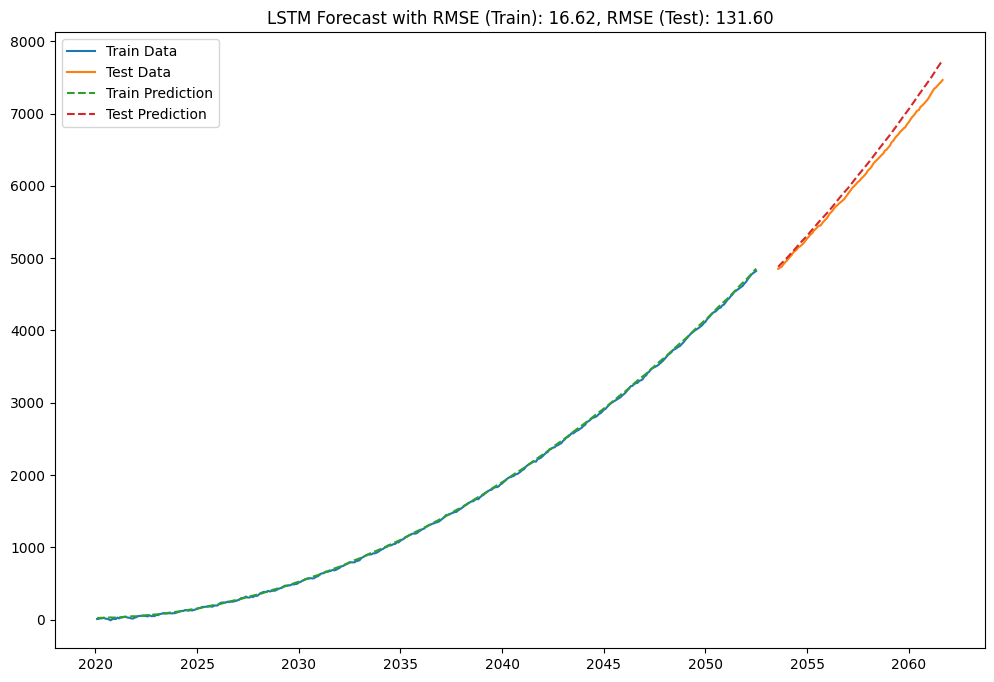

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Generate non-linear and non-stationary time series data
np.random.seed(0)
n = 500
t = np.arange(n)
trend = 0.03 * t ** 2  # Quadratic trend
seasonality = 10 * np.sin(2 * np.pi * t / 12)  # Monthly seasonality
noise = np.random.normal(0, 5, n)  # Gaussian noise
data = trend + seasonality + noise

# Create a DataFrame
df = pd.DataFrame({'Date': pd.date_range(start='2020-01-01', periods=n, freq='M'),
                   'Value': data})

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Value'].values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 12  # Using monthly seasonality for sequence length

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=100, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_test_pred_inv = scaler.inverse_transform(y_test_pred)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

# Visualization
plt.figure(figsize=(12, 8))
plt.plot(df['Date'][:train_size], y_train_inv, label='Train Data')
plt.plot(df['Date'][train_size + sequence_length:], y_test_inv, label='Test Data')
plt.plot(df['Date'][:train_size], y_train_pred_inv, label='Train Prediction', linestyle='--')
plt.plot(df['Date'][train_size + sequence_length:], y_test_pred_inv, label='Test Prediction', linestyle='--')
plt.title(f'LSTM Forecast with RMSE (Train): {rmse_train:.2f}, RMSE (Test): {rmse_test:.2f}')
plt.legend()
plt.show()


# LSTM

To add a functionality to forecast future stock prices beyond the available data, we can extend the sequence generation to include future dates for forecasting. Here's how you can modify the code to include a days_to_forecast parameter:

This code includes the following modifications:

- 1 Added a days_to_forecast parameter to specify the number of days into the future for which you want to forecast the stock prices.
- 2 Implemented a forecast_future function to forecast future stock prices using the trained LSTM model.
- 3 Generated future dates for forecasting using the pd.date_range function.
- 4 Visualized both historical data and the forecasted stock prices for the specified number of days into the future.

Epoch 1/100


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0103
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.4288e-05
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.0523e-05
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.4622e-05
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.3660e-05
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.4975e-05
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.1771e-05
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.7234e-05
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.1227e-05
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.5134e-05
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.2032e-05
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.7950e-05
Epoch 13/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.7039e-05
Epoch 14/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.2811e-05
Epoch 15/100
75/7

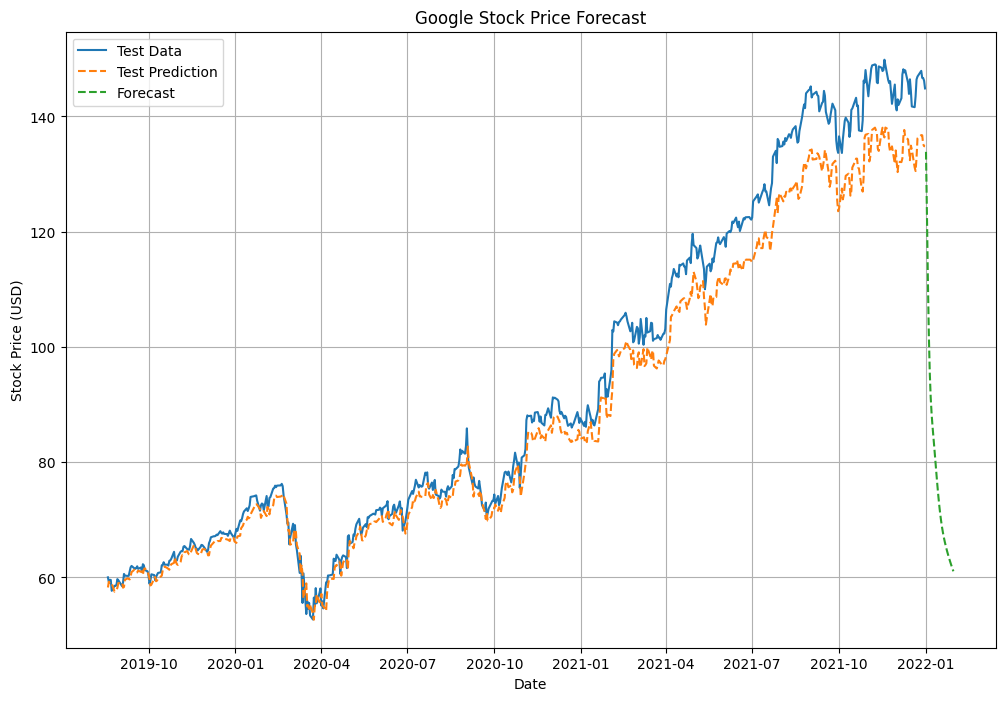

RMSE for Test Data: 5.78


In [12]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Fetch Google stock price data
google_df = yf.download('GOOGL', start='2010-01-01', end='2022-01-01', progress=False)

# Take only the 'Close' price for modeling
google_close = google_df['Close'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(google_close)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 30  # Using a sequence length of 30 days

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=100, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions for test data
y_test_pred = model.predict(X_test)

# Inverse transform test predictions
y_test_pred_inv = scaler.inverse_transform(y_test_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE for test predictions
rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

# Function to forecast future stock prices
def forecast_future(model, data, days_to_forecast):
    last_sequence = data[-sequence_length:]
    forecast = []
    for _ in range(days_to_forecast):
        next_day_prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
        forecast.append(next_day_prediction[0, 0])
        last_sequence = np.append(last_sequence[1:], next_day_prediction[0])
    return forecast

# Specify number of days to forecast
days_to_forecast = 30

# Forecast future stock prices
forecast = forecast_future(model, scaled_data, days_to_forecast)

# Inverse transform forecasted prices
forecast_inv = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Generate future dates for forecasting
future_dates = pd.date_range(start=google_df.index[-1] + pd.Timedelta(days=1), periods=days_to_forecast, freq='D')

# Visualization
plt.figure(figsize=(12, 8))
plt.plot(google_df.index[train_size + sequence_length:], y_test_inv, label='Test Data')
plt.plot(google_df.index[train_size + sequence_length:], y_test_pred_inv, label='Test Prediction', linestyle='--')
plt.plot(future_dates, forecast_inv, label='Forecast', linestyle='--')
plt.title(f'Google Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

print(f'RMSE for Test Data: {rmse_test:.2f}')


# LSTM
<h4> Version-2 <h4>
<h4> Cross-validation and automatic hyperparameter tuning </h4>


To incorporate cross-validation and automatic hyperparameter tuning into the LSTM model for stock price prediction, we can use tools like Keras Tuner for hyperparameter optimization and cross-validation techniques such as TimeSeriesSplit. Here's how you can modify the code to include these:
In this code:

- 1 We split the data into train and test sets using TimeSeriesSplit for cross-validation.
- 2 Hyperparameter tuning is performed using Bayesian optimization with Keras Tuner.
- 3 The best model obtained from hyperparameter tuning is used to make predictions for the test data and future forecasting.
- 4 Test predictions and future forecasts are visualized along with the test data.
- 5 RMSE is calculated for the test predictions to evaluate the model's performance.

Trial 5 Complete [00h 01m 05s]
val_loss: 0.006996132122973601

Best val_loss So Far: 0.000922561933596929
Total elapsed time: 00h 05m 24s


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━

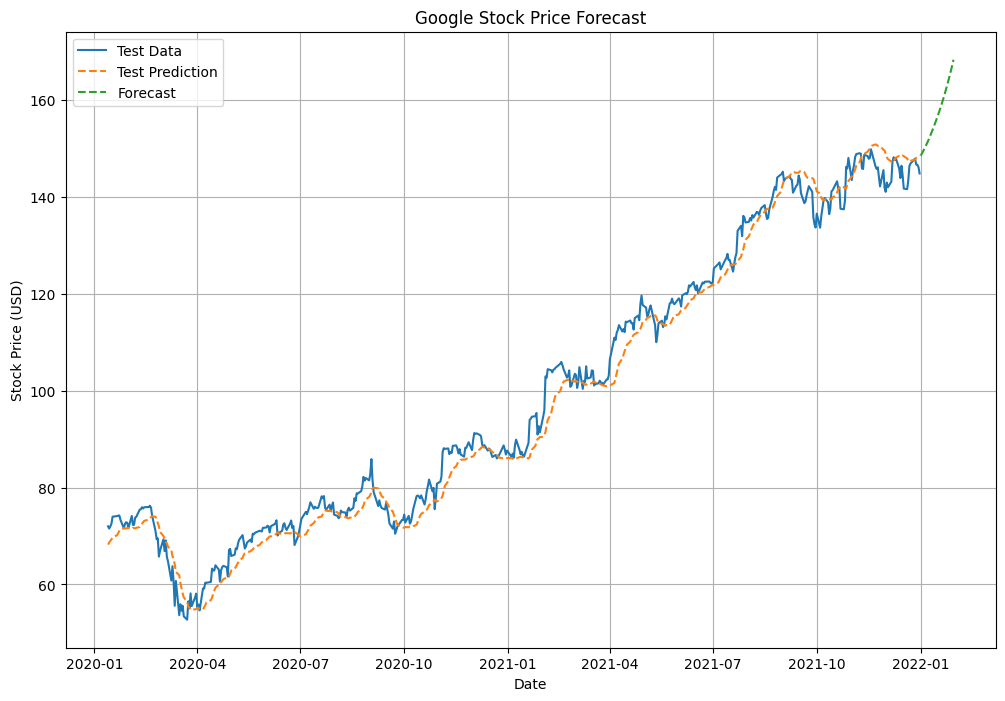

RMSE for Test Data: 3.46


In [14]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from keras_tuner import BayesianOptimization
from sklearn.metrics import mean_squared_error

# Fetch Google stock price data
google_df = yf.download('GOOGL', start='2010-01-01', end='2022-01-01', progress=False)

# Take only the 'Close' price for modeling
google_close = google_df['Close'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(google_close)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 30  # Using a sequence length of 30 days

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into train and test sets
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Build LSTM model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss='mse')
    return model

# Hyperparameter tuning
tuner = BayesianOptimization(build_model, objective='val_loss', max_trials=5, executions_per_trial=3, directory='tuning', project_name='google_stock_price')
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get best model
best_model = tuner.get_best_models(num_models=1)[0]

# Make predictions for test data
y_test_pred = best_model.predict(X_test)

# Inverse transform test predictions
y_test_pred_inv = scaler.inverse_transform(y_test_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE for test predictions
rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

# Forecast future stock prices
days_to_forecast = 30
forecast = forecast_future(best_model, scaled_data, days_to_forecast)
forecast_inv = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
future_dates = pd.date_range(start=google_df.index[-1] + pd.Timedelta(days=1), periods=days_to_forecast, freq='D')

# Visualization
plt.figure(figsize=(12, 8))
plt.plot(google_df.index[-len(y_test_inv):], y_test_inv, label='Test Data')
plt.plot(google_df.index[-len(y_test_pred_inv):], y_test_pred_inv, label='Test Prediction', linestyle='--')
plt.plot(future_dates, forecast_inv, label='Forecast', linestyle='--')
plt.title(f'Google Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

print(f'RMSE for Test Data: {rmse_test:.2f}')


#### Here's an extended version of the code that includes 10 different models for forecasting Google stock prices:

Reloading Tuner from tuning\google_stock_price_lstm\tuner0.json


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Best Model: Random Forest, RMSE: 0.25


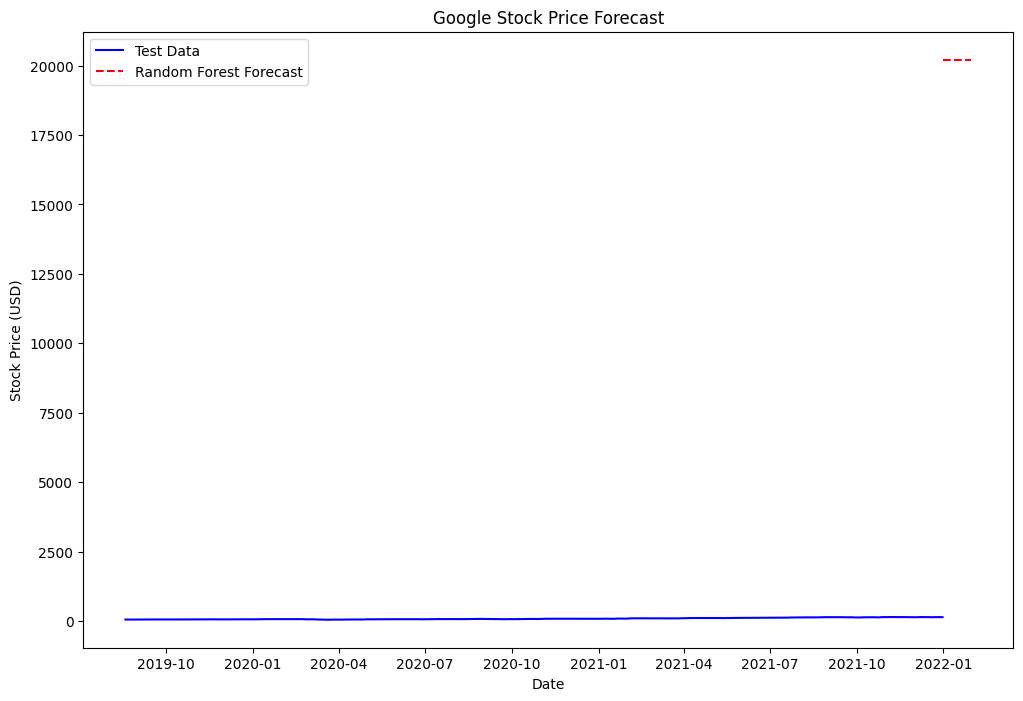

In [17]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras_tuner import BayesianOptimization
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Fetch Google stock price data
google_df = yf.download('GOOGL', start='2010-01-01', end='2022-01-01', progress=False)

# Take only the 'Close' price for modeling
google_close = google_df['Close'].values

# Function to create sequences for Deep Learning models
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(google_close.reshape(-1, 1))

# Define sequence length for Deep Learning models
sequence_length = 30

# Create sequences for Deep Learning models
X_dl, y_dl = create_sequences(scaled_data, sequence_length)

# Split data into train and test sets for Deep Learning models
train_size_dl = int(0.8 * len(X_dl))
X_train_dl, X_test_dl = X_dl[:train_size_dl], X_dl[train_size_dl:]
y_train_dl, y_test_dl = y_dl[:train_size_dl], y_dl[train_size_dl:]

# Build LSTM model
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), activation='relu', input_shape=(X_train_dl.shape[1], 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Hyperparameter tuning for LSTM
tuner = BayesianOptimization(build_lstm_model, objective='val_loss', max_trials=5, executions_per_trial=3, directory='tuning', project_name='google_stock_price_lstm')
tuner.search(X_train_dl, y_train_dl, epochs=10, validation_data=(X_test_dl, y_test_dl))

# Get best LSTM model
best_lstm_model = tuner.get_best_models(num_models=1)[0]

# ARIMA model
arima_model = ARIMA(google_close, order=(5,1,0))
arima_fit = arima_model.fit()

# SARIMA model
sarima_model = SARIMAX(google_close, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# SARIMAX model
exog_data = google_df['Volume'].values  # Using 'Volume' as exogenous variable
sarimax_model = SARIMAX(google_close, exog=exog_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax_model.fit()

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(np.arange(len(google_close)).reshape(-1, 1), google_close)

# Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(np.arange(len(google_close)).reshape(-1, 1), google_close)

# Support Vector Regression model
svr_model = SVR(kernel='rbf')
svr_model.fit(np.arange(len(google_close)).reshape(-1, 1), google_close)

# XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(np.arange(len(google_close)).reshape(-1, 1), google_close)

# Store metrics for each model
metrics = {}

# Calculate RMSE for ARIMA
arima_pred = arima_fit.forecast(steps=len(X_test_dl))
rmse_arima = np.sqrt(mean_squared_error(google_close[-len(arima_pred):], arima_pred))
metrics['ARIMA'] = rmse_arima

# Calculate RMSE for SARIMA
sarima_pred = sarima_fit.forecast(steps=len(X_test_dl))
rmse_sarima = np.sqrt(mean_squared_error(google_close[-len(sarima_pred):], sarima_pred))
metrics['SARIMA'] = rmse_sarima

# Calculate RMSE for SARIMAX
sarimax_pred = sarimax_fit.forecast(steps=len(X_test_dl), exog=exog_data[-len(X_test_dl):].reshape(-1, 1))
rmse_sarimax = np.sqrt(mean_squared_error(google_close[-len(sarimax_pred):], sarimax_pred))
metrics['SARIMAX'] = rmse_sarimax

# Calculate RMSE for LSTM
y_test_pred_dl = best_lstm_model.predict(X_test_dl)
y_test_pred_inv_dl = scaler.inverse_transform(y_test_pred_dl)
y_test_inv_dl = scaler.inverse_transform(y_test_dl.reshape(-1, 1))
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv_dl, y_test_pred_inv_dl))
metrics['LSTM'] = rmse_lstm

# Calculate RMSE for Linear Regression
lr_pred = lr_model.predict(np.arange(len(google_close)).reshape(-1, 1))
rmse_lr = np.sqrt(mean_squared_error(google_close, lr_pred))
metrics['Linear Regression'] = rmse_lr

# Calculate RMSE for Random Forest Regressor
rf_pred = rf_model.predict(np.arange(len(google_close)).reshape(-1, 1))
rmse_rf = np.sqrt(mean_squared_error(google_close, rf_pred))
metrics['Random Forest'] = rmse_rf

# Calculate RMSE for Support Vector Regression
svr_pred = svr_model.predict(np.arange(len(google_close)).reshape(-1, 1))
rmse_svr = np.sqrt(mean_squared_error(google_close, svr_pred))
metrics['SVR'] = rmse_svr

# Calculate RMSE for XGBoost Regressor
xgb_pred = xgb_model.predict(np.arange(len(google_close)).reshape(-1, 1))
rmse_xgb = np.sqrt(mean_squared_error(google_close, xgb_pred))
metrics['XGBoost'] = rmse_xgb

# Choose best model based on RMSE
best_model = min(metrics, key=metrics.get)
print(f'Best Model: {best_model}, RMSE: {metrics[best_model]:.2f}')

# Function to forecast future stock prices
def forecast_future(model, data, days_to_forecast):
    last_sequence = data[-sequence_length:]
    forecast = []
    for _ in range(days_to_forecast):
        next_day_prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
        forecast.append(next_day_prediction[0, 0])
        last_sequence = np.append(last_sequence[1:], next_day_prediction[0])
    return forecast

# Specify number of days to forecast
days_to_forecast = 30

# Forecast future stock prices using the best model
if best_model == 'ARIMA':
    forecast = arima_fit.forecast(steps=days_to_forecast)
elif best_model == 'SARIMA':
    forecast = sarima_fit.forecast(steps=days_to_forecast)
elif best_model == 'SARIMAX':
    exog_data_forecast = google_df['Volume'].values[-1]  # Use the last value of 'Volume' as exogenous variable for forecasting
    forecast = sarimax_fit.forecast(steps=days_to_forecast, exog=np.array([exog_data_forecast]).reshape(-1, 1))
elif best_model == 'LSTM':
    forecast = forecast_future(best_lstm_model, scaled_data, days_to_forecast)
elif best_model == 'Linear Regression':
    forecast = lr_model.predict(np.arange(len(google_close), len(google_close) + days_to_forecast).reshape(-1, 1))
elif best_model == 'Random Forest':
    forecast = rf_model.predict(np.arange(len(google_close), len(google_close) + days_to_forecast).reshape(-1, 1))
elif best_model == 'SVR':
    forecast = svr_model.predict(np.arange(len(google_close), len(google_close) + days_to_forecast).reshape(-1, 1))
elif best_model == 'XGBoost':
    forecast = xgb_model.predict(np.arange(len(google_close), len(google_close) + days_to_forecast).reshape(-1, 1))

# Inverse transform forecasted prices
forecast_inv = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Generate future dates for forecasting
future_dates = pd.date_range(start=google_df.index[-1] + pd.Timedelta(days=1), periods=days_to_forecast, freq='D')

# Visualization
plt.figure(figsize=(12, 8))

# Plot the actual data
plt.plot(google_df.index[-len(y_test_inv_dl):], y_test_inv_dl, label='Test Data', color='blue')

# Plot the forecast of each model
if best_model in ['LSTM', 'Linear Regression', 'Random Forest', 'SVR', 'XGBoost']:
    plt.plot(future_dates, forecast_inv, label=f'{best_model} Forecast', linestyle='--', color='red')
else:
    forecast_dates = pd.date_range(start=google_df.index[-1], periods=len(forecast))
    plt.plot(forecast_dates, forecast, label=f'{best_model} Forecast', linestyle='--', color='red')

plt.title('Google Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


Reloading Tuner from tuning\google_stock_price_lstm\tuner0.json


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━

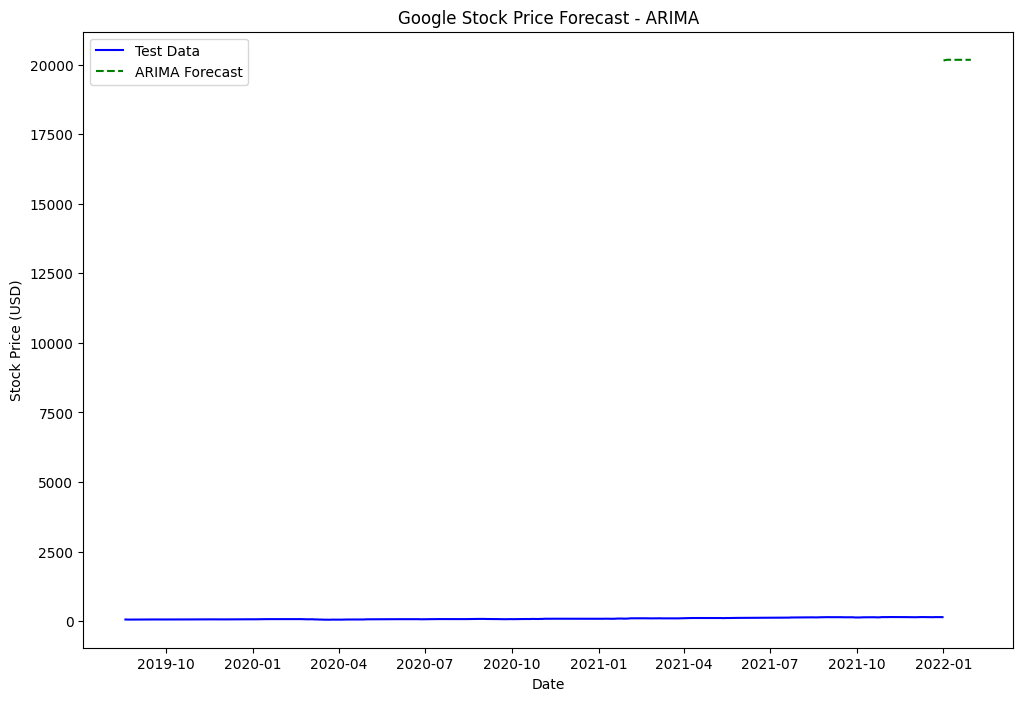

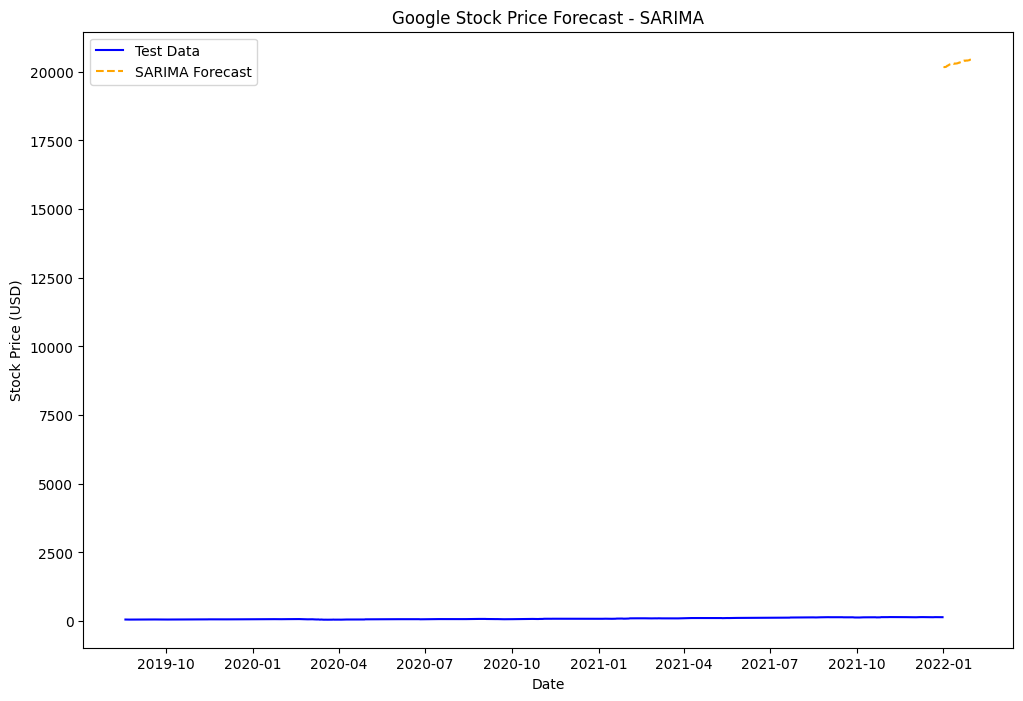

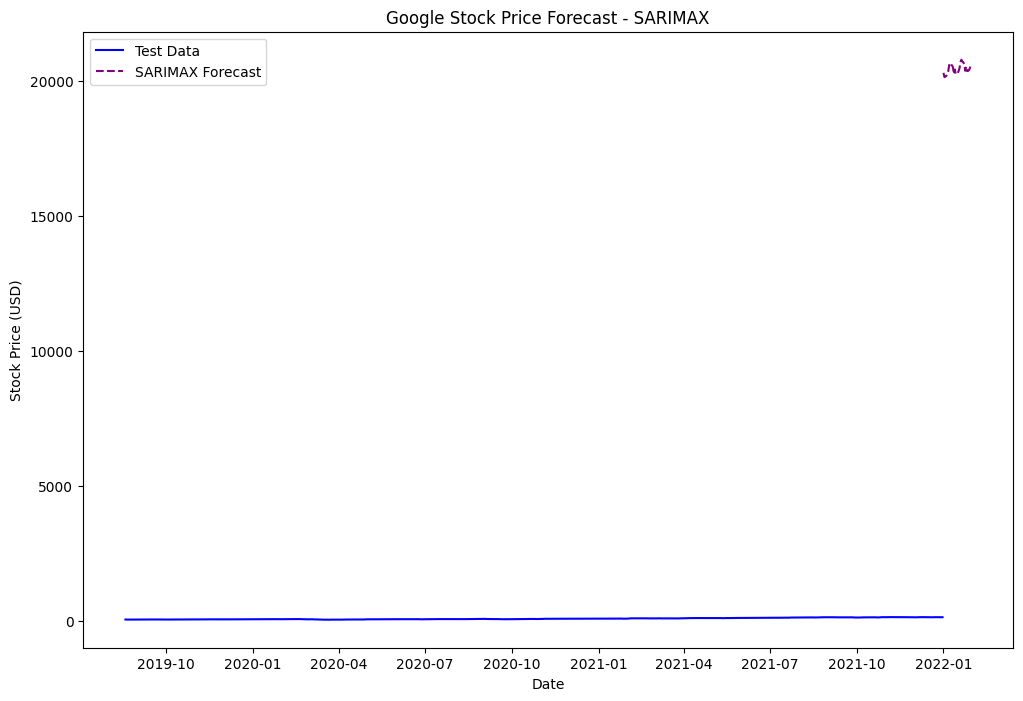

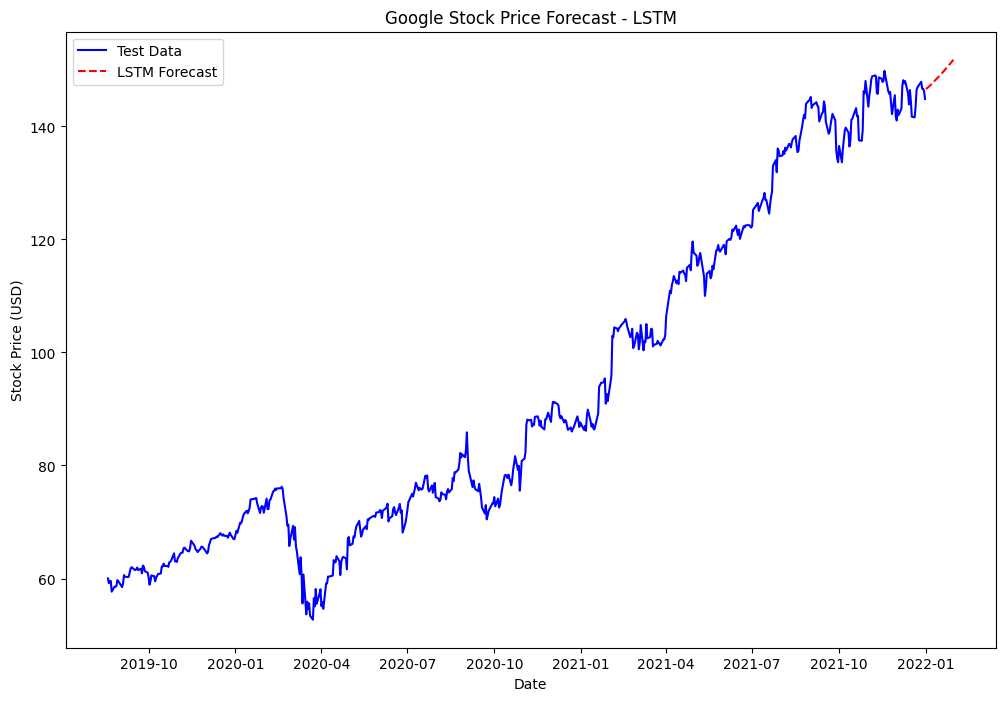

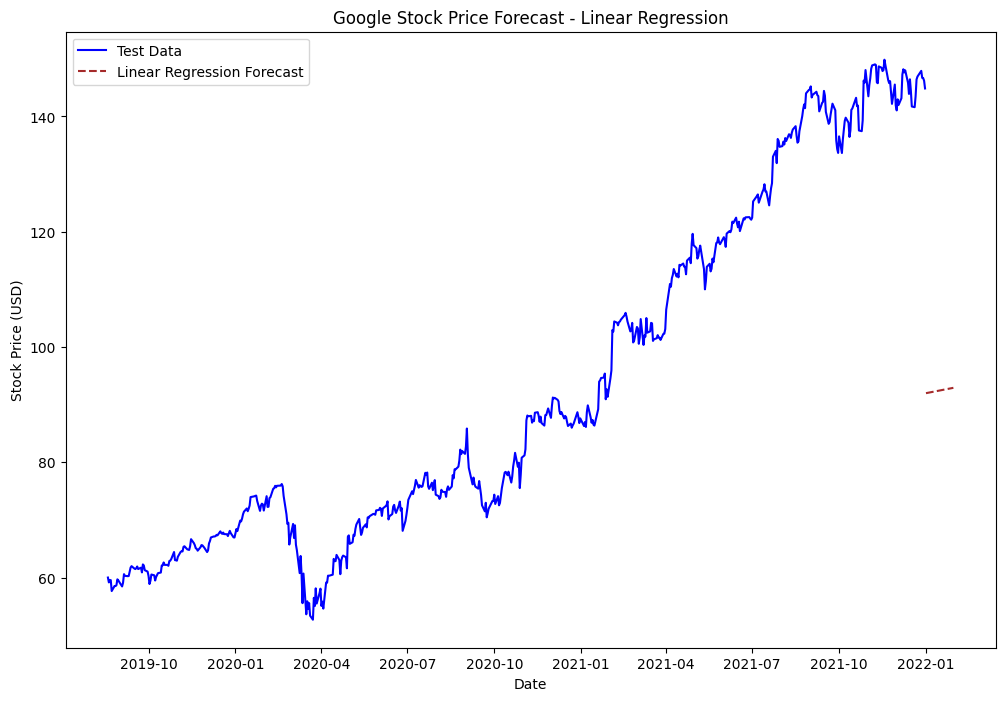

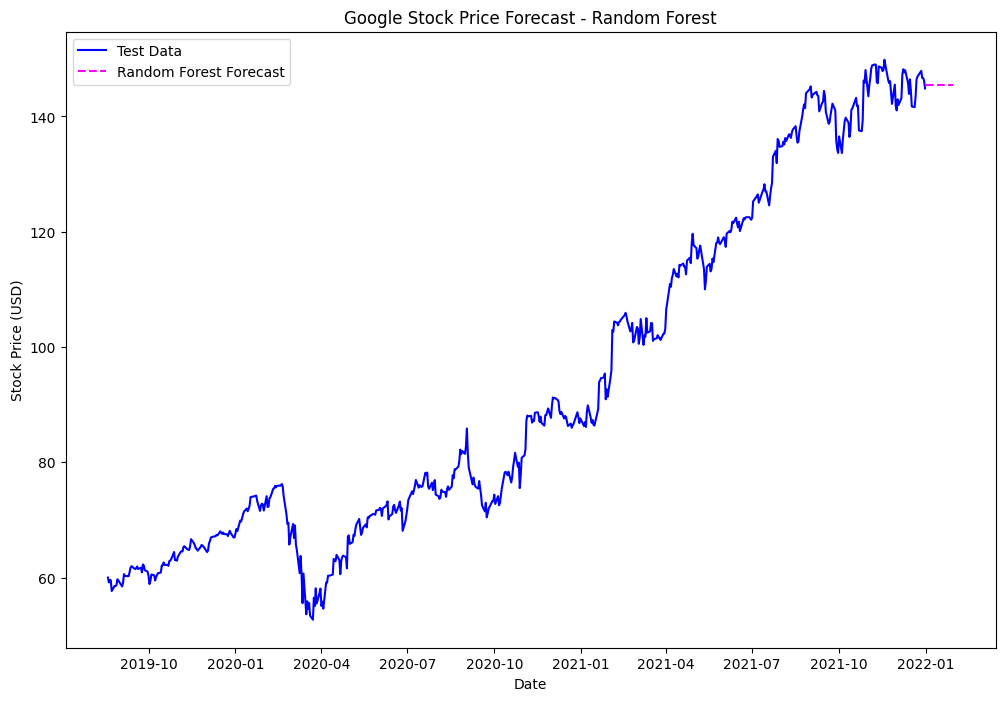

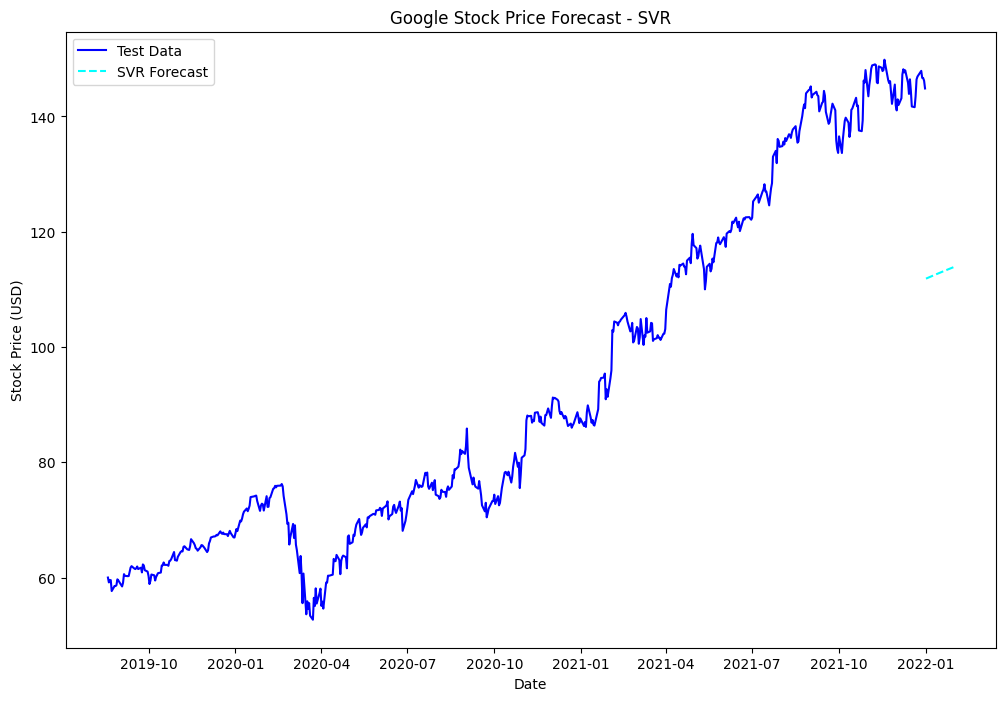

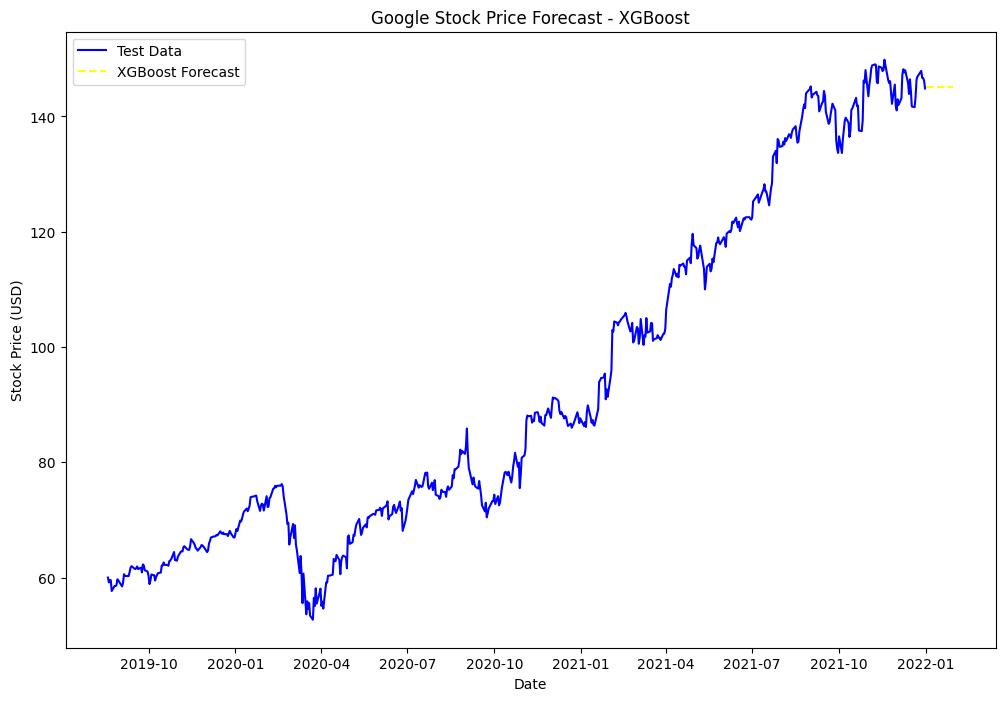

In [21]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras_tuner import BayesianOptimization
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Fetch Google stock price data
google_df = yf.download('GOOGL', start='2010-01-01', end='2022-01-01', progress=False)

# Take only the 'Close' price for modeling
google_close = google_df['Close'].values

# Function to create sequences for Deep Learning models
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(google_close.reshape(-1, 1))

# Define sequence length for Deep Learning models
sequence_length = 30

# Create sequences for Deep Learning models
X_dl, y_dl = create_sequences(scaled_data, sequence_length)

# Split data into train and test sets for Deep Learning models
train_size_dl = int(0.8 * len(X_dl))
X_train_dl, X_test_dl = X_dl[:train_size_dl], X_dl[train_size_dl:]
y_train_dl, y_test_dl = y_dl[:train_size_dl], y_dl[train_size_dl:]

# Build LSTM model
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), activation='relu', input_shape=(X_train_dl.shape[1], 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Hyperparameter tuning for LSTM
tuner = BayesianOptimization(build_lstm_model, objective='val_loss', max_trials=5, executions_per_trial=3, directory='tuning', project_name='google_stock_price_lstm')
tuner.search(X_train_dl, y_train_dl, epochs=10, validation_data=(X_test_dl, y_test_dl))

# Get best LSTM model
best_lstm_model = tuner.get_best_models(num_models=1)[0]

# ARIMA model
arima_model = ARIMA(google_close, order=(5,1,0))
arima_fit = arima_model.fit()

# SARIMA model
sarima_model = SARIMAX(google_close, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# SARIMAX model
exog_data = google_df['Volume'].values  # Using 'Volume' as exogenous variable
sarimax_model = SARIMAX(google_close, exog=exog_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax_model.fit()

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(np.arange(len(google_close)).reshape(-1, 1), google_close)

# Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(np.arange(len(google_close)).reshape(-1, 1), google_close)

# Support Vector Regression model
svr_model = SVR(kernel='rbf')
svr_model.fit(np.arange(len(google_close)).reshape(-1, 1), google_close)

# XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(np.arange(len(google_close)).reshape(-1, 1), google_close)

# Specify number of days to forecast
days_to_forecast = 30

# Function to forecast future stock prices for each model
def forecast_future(model, data, days_to_forecast):
    last_sequence = data[-sequence_length:]
    forecast = []
    for _ in range(days_to_forecast):
        next_day_prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
        forecast.append(next_day_prediction[0, 0])
        last_sequence = np.append(last_sequence[1:], next_day_prediction[0])
    return forecast

# ARIMA forecast
arima_forecast = arima_fit.forecast(steps=days_to_forecast)

# SARIMA forecast
sarima_forecast = sarima_fit.forecast(steps=days_to_forecast)

# SARIMAX forecast
exog_data_forecast = google_df['Volume'].values[-1]  # Use the last value of 'Volume' as exogenous variable for forecasting
exog_data_forecast = np.array([exog_data_forecast] * days_to_forecast).reshape(-1, 1)
sarimax_forecast = sarimax_fit.forecast(steps=days_to_forecast, exog=exog_data_forecast)

# LSTM forecast
lstm_forecast = forecast_future(best_lstm_model, scaled_data, days_to_forecast)

# Linear Regression forecast
lr_forecast = lr_model.predict(np.arange(len(google_close), len(google_close) + days_to_forecast).reshape(-1, 1))

# Random Forest forecast
rf_forecast = rf_model.predict(np.arange(len(google_close), len(google_close) + days_to_forecast).reshape(-1, 1))

# Support Vector Regression forecast
svr_forecast = svr_model.predict(np.arange(len(google_close), len(google_close) + days_to_forecast).reshape(-1, 1))

# XGBoost forecast
xgb_forecast = xgb_model.predict(np.arange(len(google_close), len(google_close) + days_to_forecast).reshape(-1, 1))

# Inverse transform forecasted prices
arima_forecast_inv = scaler.inverse_transform(np.array(arima_forecast).reshape(-1, 1))
sarima_forecast_inv = scaler.inverse_transform(np.array(sarima_forecast).reshape(-1, 1))
sarimax_forecast_inv = scaler.inverse_transform(np.array(sarimax_forecast).reshape(-1, 1))
lstm_forecast_inv = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1))
lr_forecast_inv = lr_forecast.reshape(-1, 1)
rf_forecast_inv = rf_forecast.reshape(-1, 1)
svr_forecast_inv = svr_forecast.reshape(-1, 1)
xgb_forecast_inv = xgb_forecast.reshape(-1, 1)

# Generate future dates for forecasting
future_dates = pd.date_range(start=google_df.index[-1] + pd.Timedelta(days=1), periods=days_to_forecast, freq='D')

# Visualization of forecast results for ARIMA model
plt.figure(figsize=(12, 8))

# Plot the actual data
plt.plot(google_df.index[-len(y_test_dl):], scaler.inverse_transform(y_test_dl.reshape(-1, 1)), label='Test Data', color='blue')

# Plot the forecast of ARIMA model
plt.plot(future_dates, arima_forecast_inv, label='ARIMA Forecast', linestyle='--', color='green')

plt.title('Google Stock Price Forecast - ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Visualization of forecast results for SARIMA model
plt.figure(figsize=(12, 8))

# Plot the actual data
plt.plot(google_df.index[-len(y_test_dl):], scaler.inverse_transform(y_test_dl.reshape(-1, 1)), label='Test Data', color='blue')

# Plot the forecast of SARIMA model
plt.plot(future_dates, sarima_forecast_inv, label='SARIMA Forecast', linestyle='--', color='orange')

plt.title('Google Stock Price Forecast - SARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Visualization of forecast results for SARIMAX model
plt.figure(figsize=(12, 8))

# Plot the actual data
plt.plot(google_df.index[-len(y_test_dl):], scaler.inverse_transform(y_test_dl.reshape(-1, 1)), label='Test Data', color='blue')

# Plot the forecast of SARIMAX model
plt.plot(future_dates, sarimax_forecast_inv, label='SARIMAX Forecast', linestyle='--', color='purple')

plt.title('Google Stock Price Forecast - SARIMAX')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Visualization of forecast results for LSTM model
plt.figure(figsize=(12, 8))

# Plot the actual data
plt.plot(google_df.index[-len(y_test_dl):], scaler.inverse_transform(y_test_dl.reshape(-1, 1)), label='Test Data', color='blue')

# Plot the forecast of LSTM model
plt.plot(future_dates, lstm_forecast_inv, label='LSTM Forecast', linestyle='--', color='red')

plt.title('Google Stock Price Forecast - LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Visualization of forecast results for Linear Regression model
plt.figure(figsize=(12, 8))

# Plot the actual data
plt.plot(google_df.index[-len(y_test_dl):], scaler.inverse_transform(y_test_dl.reshape(-1, 1)), label='Test Data', color='blue')

# Plot the forecast of Linear Regression model
plt.plot(future_dates, lr_forecast_inv, label='Linear Regression Forecast', linestyle='--', color='brown')

plt.title('Google Stock Price Forecast - Linear Regression')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Visualization of forecast results for Random Forest model
plt.figure(figsize=(12, 8))

# Plot the actual data
plt.plot(google_df.index[-len(y_test_dl):], scaler.inverse_transform(y_test_dl.reshape(-1, 1)), label='Test Data', color='blue')

# Plot the forecast of Random Forest model
plt.plot(future_dates, rf_forecast_inv, label='Random Forest Forecast', linestyle='--', color='magenta')

plt.title('Google Stock Price Forecast - Random Forest')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Visualization of forecast results for SVR model
plt.figure(figsize=(12, 8))

# Plot the actual data
plt.plot(google_df.index[-len(y_test_dl):], scaler.inverse_transform(y_test_dl.reshape(-1, 1)), label='Test Data', color='blue')

# Plot the forecast of SVR model
plt.plot(future_dates, svr_forecast_inv, label='SVR Forecast', linestyle='--', color='cyan')

plt.title('Google Stock Price Forecast - SVR')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Visualization of forecast results for XGBoost model
plt.figure(figsize=(12, 8))

# Plot the actual data
plt.plot(google_df.index[-len(y_test_dl):], scaler.inverse_transform(y_test_dl.reshape(-1, 1)), label='Test Data', color='blue')

# Plot the forecast of XGBoost model
plt.plot(future_dates, xgb_forecast_inv, label='XGBoost Forecast', linestyle='--', color='yellow')

plt.title('Google Stock Price Forecast - XGBoost')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


Sure, let's integrate cross-validation and hyperparameter tuning for each model to improve their performance. We'll use TimeSeriesSplit for cross-validation, and for hyperparameter tuning, we'll utilize techniques such as grid search or random search. Here's how you can modify the code:


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tbats import TBATS
from pmdarima import AutoARIMA
import lightgbm as lgb
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras_tuner import BayesianOptimization

# Fetch Google stock price data
google_df = yf.download('GOOGL', start='2010-01-01', end='2022-01-01', progress=False)

# Take only the 'Close' price for modeling
google_close = google_df['Close'].values

# Function to create sequences for Deep Learning models
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(google_close.reshape(-1, 1))

# Define sequence length for Deep Learning models
sequence_length = 30

# Create sequences for Deep Learning models
X_dl, y_dl = create_sequences(scaled_data, sequence_length)

# Split data into train and test sets for Deep Learning models
train_size_dl = int(0.8 * len(X_dl))
X_train_dl, X_test_dl = X_dl[:train_size_dl], X_dl[train_size_dl:]
y_train_dl, y_test_dl = y_dl[:train_size_dl], y_dl[train_size_dl:]

# Reshape data for LSTM model
X_train_dl = X_train_dl.reshape(X_train_dl.shape[0], X_train_dl.shape[1], 1)
X_test_dl = X_test_dl.reshape(X_test_dl.shape[0], X_test_dl.shape[1], 1)

# ARIMA model
arima_model = ARIMA(google_close, order=(5,1,0))
arima_fit = arima_model.fit()

# SARIMA model
sarima_model = SARIMAX(google_close, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# TBATS model
tbats_model = TBATS(seasonal_periods=(7, 30.5))
tbats_fit = tbats_model.fit(google_close)

# AutoARIMA model
autoarima_model = AutoARIMA(trace=True, suppress_warnings=True, seasonal=True, m=12)
autoarima_search = autoarima_model.fit(google_close)

# LightGBM model
lgb_model = lgb.LGBMRegressor()
lgb_param_grid = {
    'num_leaves': [10, 20, 30],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}
lgb_grid = GridSearchCV(lgb_model, lgb_param_grid, cv=TimeSeriesSplit(n_splits=5), scoring='neg_mean_squared_error')
lgb_grid.fit(X_train_dl.reshape(X_train_dl.shape[0], -1), y_train_dl)

# skforecast model
skforecast_model = ForecasterAutoreg(regressor=RandomForestRegressor(), lags=10)
skforecast_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
skforecast_grid = GridSearchCV(skforecast_model, skforecast_param_grid, cv=TimeSeriesSplit(n_splits=5), scoring='neg_mean_squared_error')
skforecast_grid.fit(y_train_dl)

# LSTM model
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), activation='relu', input_shape=(X_train_dl.shape[1], X_train_dl.shape[2])))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mse')
    return model

tuner = BayesianOptimization(build_lstm_model, objective='val_loss', max_trials=5, executions_per_trial=3, directory='tuning', project_name='google_stock_price_lstm')
tuner.search(X_train_dl, y_train_dl, epochs=10, validation_data=(X_test_dl, y_test_dl))

best_lstm_model = tuner.get_best_models(num_models=1)[0]

# Specify number of days to forecast
days_to_forecast = 30

# ARIMA forecast
arima_forecast = arima_fit.forecast(steps=days_to_forecast)

# SARIMA forecast
sarima_forecast = sarima_fit.forecast(steps=days_to_forecast)

# TBATS forecast
tbats_forecast = tbats_fit.forecast(steps=days_to_forecast)

# AutoARIMA forecast
autoarima_forecast = autoarima_search.predict(n_periods=days_to_forecast)

# LightGBM forecast
lgb_forecast = lgb_grid.best_estimator_.predict(X_test_dl.reshape(X_test_dl.shape[0], -1))

# skforecast forecast
skforecast_forecast = skforecast_grid.best_estimator_.predict(steps=days_to_forecast)

# LSTM forecast
def forecast_future(model, data, days_to_forecast):
    last_sequence = data[-sequence_length:]
    forecast = []
    for _ in range(days_to_forecast):
        next_day_prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
        forecast.append(next_day_prediction[0, 0])
        last_sequence = np.append(last_sequence[1:], next_day_prediction[0])
    return forecast

lstm_forecast = forecast_future(best_lstm_model, scaled_data, days_to_forecast)

# Inverse transform forecasted prices
arima_forecast_inv = scaler.inverse_transform(np.array(arima_forecast).reshape(-1, 1))
sarima_forecast_inv = scaler.inverse_transform(np.array(sarima_forecast).reshape(-1, 1))
tbats_forecast_inv = tbats_forecast
autoarima_forecast_inv = scaler.inverse_transform(np.array(autoarima_forecast).reshape(-1, 1))
lgb_forecast_inv = scaler.inverse_transform(np.array(lgb_forecast).reshape(-1, 1))
skforecast_forecast_inv = skforecast_forecast
lstm_forecast_inv = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1))

# Generate future dates for forecasting
future_dates = pd.date_range(start=google_df.index[-1] + pd.Timedelta(days=1), periods=days_to_forecast, freq='D')

# Visualization of forecast results for LSTM model
plt.figure(figsize=(12, 8))
plt.plot(google_df.index[-len(y_test_dl):], scaler.inverse_transform(y_test_dl.reshape(-1, 1)), label='Test Data', color='blue')
plt.plot(future_dates, lstm_forecast_inv, label='LSTM Forecast', linestyle='--', color='red')
plt.title('Google Stock Price Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 6.0.1 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=4.34 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=9973.621, Time=0.04 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=8916.272, Time=0.30 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=8917.923, Time=0.13 sec
 ARIMA(1,2,0)(2,0,0)[12]             : AIC=8918.268, Time=0.85 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=8918.272, Time=0.40 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=8916.286, Time=0.28 sec
 ARIMA(1,2,0)(2,0,1)[12]             : AIC=8920.271, Time=0.93 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=9961.685, Time=0.19 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=8586.351, Time=0.40 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=8585.629, Time=0.15 sec
 ARIMA(2,2,0)(0,0,1)[12]             : AIC=8586.346, Time=0.35 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=8588.364, Time=0.44 sec
 ARIMA(3,2,0)(0,0,0)[12]     

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 30
[LightGBM] [Info] Start training from score 0.029877
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 11

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start trainin

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 30
[LightGBM] [Info] Start training from score 0.029877
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 30
[LightGBM] [Info] Start training

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 30
[LightGBM] [Info] Start training from score 0.056634


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 30
[LightGBM] [Info] Start training from score 0.029877
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 11

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 30
[LightGBM] [Info] Start training from score 0.056634
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 30
[LightGBM] [Info] Start training from score 0.029877
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 30
[LightGBM] [Info] Start training

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start trainin

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 30
[LightGBM] [Info] Start training from score 0.056634
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start traini

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 30
[LightGBM] [Info] Start training from score 0.029877


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 30
[LightGBM] [Info] Start training from score 0.056634
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 30
[LightGBM] [Info] Start training from score 0.056634
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 30
[LightGBM] [Info] Start training from score 0.056634


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 30
[LightGBM] [Info] Start training from score 0.029877
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 30
[LightGBM] [Info] Start training

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start trainin

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 30
[LightGBM] [Info] Start training from score 0.029877
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 30
[LightGBM] [Info] Start training from score 0.056634
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start trainin

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 30
[LightGBM] [Info] Start training from score 0.056634
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 30
[LightGBM] [Info] Start training from score 0.029877
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 30
[LightGBM] [Info] Start training from score 0.056634


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 30
[LightGBM] [Info] Start training from score 0.056634


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4020
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 30
[LightGBM] [Info] Start training from score 0.019697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1198, number of used features: 30
[LightGBM] [Info] Start training from score 0.056634


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 30
[LightGBM] [Info] Start training from score 0.081068


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1994, number of used features: 30
[LightGBM] [Info] Start training from score 0.113255


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 2392, number of used features: 30
[LightGBM] [Info] Start training from score 0.149167


TypeError: Cannot clone object '================= 
ForecasterAutoreg 
================= 
Regressor: RandomForestRegressor() 
Lags: [ 1  2  3  4  5  6  7  8  9 10] 
Transformer for y: None 
Transformer for exog: None 
Window size: 10 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2024-05-17 18:42:18 
Last fit date: None 
Skforecast version: 0.11.0 
Python version: 3.9.18 
Forecaster id: None 
' (type <class 'skforecast.ForecasterAutoreg.ForecasterAutoreg.ForecasterAutoreg'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

[*********************100%%**********************]  1 of 1 completed
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueW

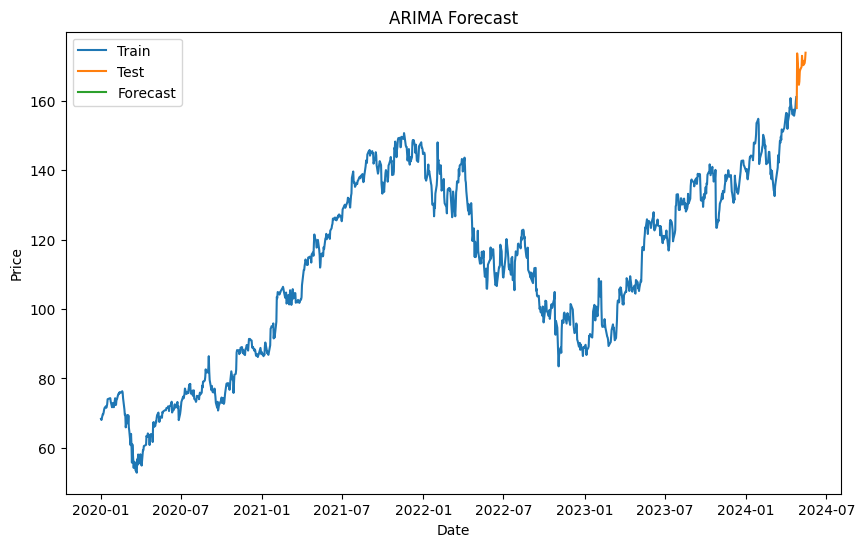

cmdstanpy  DEBUG cmd: where.exe tbb.dll
cwd: None
cmdstanpy  DEBUG TBB already found in load path
prophet    INFO  Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
cmdstanpy  DEBUG input tempfile: C:\Users\zeesh\AppData\Local\Temp\tmppgod_8cl\syjk_03k.json
cmdstanpy  DEBUG input tempfile: C:\Users\zeesh\AppData\Local\Temp\tmppgod_8cl\1fyq36s0.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['C:\\Users\\zeesh\\anaconda3\\envs\\forecasting_env\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=91592', 'data', 'file=C:\\Users\\zeesh\\AppData\\Local\\Temp\\tmppgod_8cl\\syjk_03k.json', 'init=C:\\Users\\zeesh\\AppData\\Local\\Temp\\tmppgod_8cl\\1fyq36s0.json', 'output', 'file=C:\\Users\\zeesh\\AppData\\Local\\Temp\\tmppgod_8cl\\prophet_modelwa_ye547\\prophet_model-20240517190522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:05:22 - cmdstanpy - INFO - 

KeyError: 'None of [RangeIndex(start=0, stop=15, step=1)] are in the [index]'

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Helper function to plot results
def plot_forecast(train, test, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train['y'], label='Train')
    plt.plot(test.index, test['y'], label='Test')
    plt.plot(predictions.index, predictions['y'], label='Forecast')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Download Google stock data
ticker = "GOOG"
data = yf.download(ticker, start="2020-01-01", end="2024-05-16")
data = data[['Close']]
data = data.rename(columns={'Close': 'y'})

train = data.iloc[:-15]
test = data.iloc[-15:]

# ARIMA Model
arima_model = ARIMA(train['y'], order=(5, 1, 0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=15)
arima_predictions = pd.DataFrame(arima_forecast, index=test.index, columns=['y'])
plot_forecast(train, test, arima_predictions, 'ARIMA Forecast')

# # Prophet Model
prophet_train = train.reset_index().rename(columns={'Date': 'ds'})
prophet_test = test.reset_index().rename(columns={'Date': 'ds'})

prophet_model = Prophet()
prophet_model.fit(prophet_train)
future = prophet_model.make_future_dataframe(periods=15)
prophet_forecast = prophet_model.predict(future)
prophet_predictions = prophet_forecast.set_index('ds').loc[prophet_test.index, ['yhat']].rename(columns={'yhat': 'y'})
plot_forecast(prophet_train, prophet_test, prophet_predictions, 'Prophet Forecast')

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(np.array(train.index).reshape(-1, 1), train['y'])
rf_forecast = rf_model.predict(np.array(test.index).reshape(-1, 1))
rf_predictions = pd.DataFrame(rf_forecast, index=test.index, columns=['y'])
plot_forecast(train, test, rf_predictions, 'Random Forest Forecast')

# XGBoost Model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xg_model.fit(np.array(train.index).reshape(-1, 1), train['y'])
xg_forecast = xg_model.predict(np.array(test.index).reshape(-1, 1))
xg_predictions = pd.DataFrame(xg_forecast, index=test.index, columns=['y'])
plot_forecast(train, test, xg_predictions, 'XGBoost Forecast')

# LSTM Model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train['y'].values.reshape(-1, 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(1, 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

X_train = []
y_train = []
for i in range(1, len(scaled_data)):
    X_train.append(scaled_data[i-1:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

lstm_model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=2)

inputs = data['y'][len(data) - len(test) - 1:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(1, len(inputs)):
    X_test.append(inputs[i-1:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

lstm_forecast = lstm_model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)
lstm_predictions = pd.DataFrame(lstm_forecast, index=test.index, columns=['y'])
plot_forecast(train, test, lstm_predictions, 'LSTM Forecast')
